# Multivariate GPR

See https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-prior-posterior-py

See also https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

## function in two variables

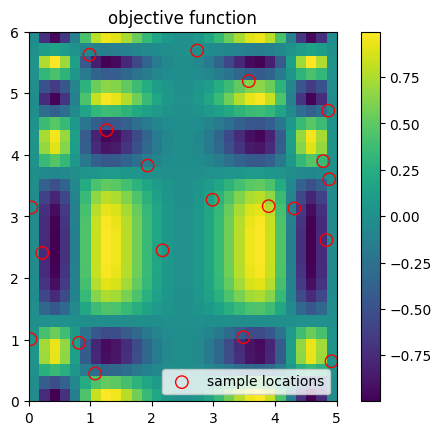

In [10]:
rng = np.random.RandomState(4)

xmax = 5
ymax = 6
xmin = 0
ymin = 0
X_train = rng.uniform(xmin, xmax, 20) #.reshape(-1, 1)
Y_train = rng.uniform(ymin, ymax, 20) #.reshape(-1, 1)

def f_objective(x,y):
    """
    the objective function at x and y
    """
    return np.sin((x - 2.5) ** 2)*np.cos((y - 2.5) ** 2)

# z_train = np.sin((X_train[:, 0] - 2.5) ** 2)*np.sin((Y_train[:, 0] - 2.5) ** 2)
z_train = f_objective(X_train, Y_train)

x_hi_res = np.linspace(xmin,xmax,30)
y_hi_res = np.linspace(ymin,ymax,30)
XX,YY = np.meshgrid(x_hi_res,y_hi_res)
ZZ = f_objective(XX,YY)

fig,ax = plt.subplots()
cax= ax.imshow(ZZ,origin='lower',extent=[xmin,xmax,ymin,ymax])
ax.scatter(X_train, Y_train, s=80, facecolors='none', edgecolors='r', label='sample locations')
ax.set_title("objective function")
ax.legend()
fig.colorbar(cax)

C:\Users\prest\.virtualenvs\gmaps-vis-VthAHKuJ\lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


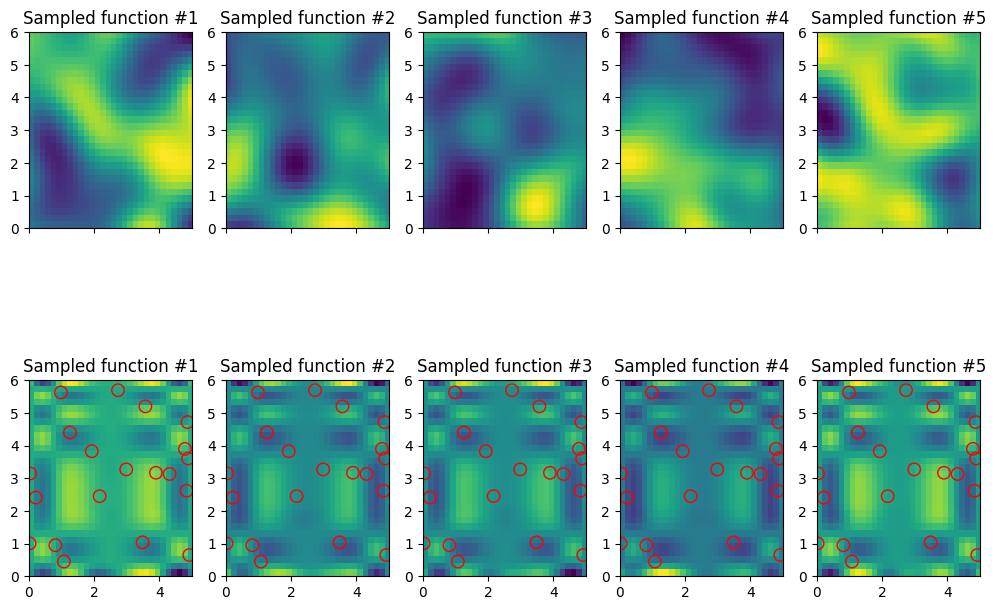

In [19]:
n_samples = 5 # how many functions to draw from the distribution of candidate functions 

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr_model = gpr

fig, axes = plt.subplots(nrows=2, ncols=n_samples, sharex=True, figsize=(10, 8))

# plot prior dist. samples
pts = np.array([XX,YY]).reshape(2,-1).transpose()
z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[0,idx]
    cax= ax.imshow(single_prior.reshape(XX.shape),origin='lower',extent=[xmin,xmax,ymin,ymax])
    ax.set_title(f"Sampled function #{idx + 1}")

z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

# get posterior distribution
XX_train, YY_train = np.meshgrid(X_train, Y_train)
pts_train = np.array([XX_train,YY_train]).reshape(2,-1).transpose()
ZZ_train = f_objective(XX_train,YY_train)

gpr.fit(pts_train, ZZ_train.flatten())

# plot posterior dist. samples

z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[1,idx]
    cax= ax.imshow(single_prior.reshape(XX.shape),origin='lower',extent=[xmin,xmax,ymin,ymax])
    ax.scatter(X_train, Y_train, s=80, facecolors='none', edgecolors='r', label='sample locations')
    ax.set_title(f"Sampled function #{idx + 1}")

fig.tight_layout()
# # plot posterior
# gpr.fit(np.array([X_train,Y_train]).transpose(), z_train)

# # fig.suptitle("Radial Basis Function kernel", fontsize=18)
# plt.tight_layout()